# DIC - Data cleaning and EDA 

In [2]:
import pandas as pd
import requests
import re
import numpy as np
from scipy.signal import correlate
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

# (a) Load the dataset from the url 

In [5]:
df = pd.read_csv(url)
df

iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   
...         ...       ...          ...         ...          ...        ...   
429430      ZWE    Africa     Zimbabwe  2024-07-31     266386.0        0.0   
429431      ZWE    Africa     Zimbabwe  2024-08-01     266386.0        0.0   
429432      ZWE    Africa     Zimbabwe  2024-08-02     266386.0        0.0   
429433      ZWE    Africa     Zimbabwe  2024-08-03     266386.0        0.0   
429434      ZWE    Africa     Zimbabwe  2024-08-04     266386.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           0.0         0.0                  NaN   
1                      NaN           0.0         0.0                  NaN   
2                      NaN           0.0         0.0                  NaN   
3                      NaN           0.0         0.0                  NaN   
4                      NaN           0.0         0.0                  NaN   
...                    ...           ...         ...                  ...   
429430                 0.0        5740.0         0.0                  0.0   
429431                 0.0        5740.0         0.0                  0.0   
429432                 0.0        5740.0         0.0                  0.0   
429433                 0.0        5740.0         0.0                  0.0   
429434                 0.0        5740.0         0.0                  0.0   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0       ...           NaN                  37.746                         0.5   
1       ...           NaN                  37.746                         0.5   
2       ...           NaN                  37.746                         0.5   
3       ...           NaN                  37.746                         0.5   
4       ...           NaN                  37.746                         0.5   
...     ...           ...                     ...                         ...   
429430  ...          30.7                  36.791                         1.7   
429431  ...          30.7                  36.791                         1.7   
429432  ...          30.7                  36.791                         1.7   
429433  ...          30.7                  36.791                         1.7   
429434  ...          30.7                  36.791                         1.7   

        life_expectancy  human_development_index  population  \
0                 64.83                    0.511    41128772   
1                 64.83                    0.511    41128772   
2                 64.83                    0.511    41128772   
3                 64.83                    0.511    41128772   
4                 64.83                    0.511    41128772   
...                 ...                      ...         ...   
429430            61.49                    0.571    16320539   
429431            61.49                    0.571    16320539   
429432            61.49                    0.571    16320539   
429433            61.49                    0.571    16320539   
429434            61.49                    0.571    16320539   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN                          NaN   
4                 

# (b) (i) Displaying the metadata info of columns of the dataset

In [7]:
df.info() #  Trying to understand the dataset by its type and how well-built the data is

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

## Trying to understand the data and examine for any unusual data entries (like negative,zero,decimals) 

In [9]:
df.describe() # There are no anomalies in the data

total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  4.118040e+05  4.101590e+05        4.089290e+05  4.118040e+05   
mean   7.365292e+06  8.017360e+03        8.041026e+03  8.125957e+04   
std    4.477582e+07  2.296649e+05        8.661611e+04  4.411901e+05   
min    0.000000e+00  0.000000e+00        0.000000e+00  0.000000e+00   
25%    6.280750e+03  0.000000e+00        0.000000e+00  4.300000e+01   
50%    6.365300e+04  0.000000e+00        1.200000e+01  7.990000e+02   
75%    7.582720e+05  0.000000e+00        3.132860e+02  9.574000e+03   
max    7.758668e+08  4.423623e+07        6.319461e+06  7.057132e+06   

          new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  410608.000000        409378.000000            411804.000000   
mean       71.852139            72.060873            112096.199396   
std      1368.322990           513.636567            162240.412419   
min         0.000000             0.000000                 0.000000   
25%         0.000000             0.000000              1916.100500   
50%         0.000000             0.000000             29145.475000   
75%         0.000000             3.143000            156770.190000   
max    103719.000000         14817.000000            763598.600000   

       new_cases_per_million  new_cases_smoothed_per_million  \
count          410159.000000                   408929.000000   
mean              122.357074                      122.713844   
std              1508.778583                      559.701638   
min                 0.000000                        0.000000   
25%                 0.000000                        0.000000   
50%                 0.000000                        2.794000   
75%                 0.000000                       56.253000   
max            241758.230000                    34536.890000   

       total_deaths_per_million  ...   male_smokers  handwashing_facilities  \
count             411804.000000  ...  243817.000000           161741.000000   
mean                 835.514313  ...      33.097723               50.649264   
std                 1134.932671  ...      13.853948               31.905375   
min                    0.000000  ...       7.700000                1.188000   
25%                   24.568000  ...      22.600000               20.859000   
50%                  295.089000  ...      33.100000               49.542000   
75%                 1283.817000  ...      41.500000               82.502000   
max                 6601.110000  ...      78.100000              100.000000   

       hospital_beds_per_thousand  life_expectancy  human_development_index  \
count               290689.000000    390299.000000            319127.000000   
mean                     3.106912        73.702098                 0.722139   
std                      2.549205         7.387914                 0.148903   
min                      0.100000        53.280000                 0.394000   
25%                      1.300000        69.500000                 0.602000   
50%                      2.500000        75.050000                 0.740000   
75%                      4.210000        79.460000                 0.829000   
max                     13.800000        86.750000                 0.957000   

         population  excess_mortality_cumulative_absolute  \
count  4.294350e+05                          1.341100e+04   
mean   1.520336e+08                          5.604765e+04   
std    6.975408e+08                          1.568691e+05   
min    4.700000e+01                         -3.772610e+04   
25%    5.237980e+05                          1.765000e+02   
50%    6.336393e+06                          6.815199e+03   
75%    3.296952e+07                          3.912804e+04   
max    7.975105e+09                          1.349776e+06   

       excess_mortality_cumulative  excess_mortality  \
count                 13411.000000      13411.000000   
mean                      9.766431         10.925353   
std               

## Cleaning the dataset

In [11]:
duplicates = df.duplicated() # check for any duplicated row entries
num = duplicates.sum()
print("No. of duplicated rows :",num)

No. of duplicated rows : 0


In [12]:
df.isnull().sum() # Lot of incomplete data (NaN values)

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [13]:
df.nunique() # Checking for unique values to understand the number of countries included and other features

iso_code                                     255
continent                                      6
location                                     255
date                                        1688
total_cases                                36694
                                           ...  
population                                   255
excess_mortality_cumulative_absolute       13205
excess_mortality_cumulative                 4218
excess_mortality                            5474
excess_mortality_cumulative_per_million    13351
Length: 67, dtype: int64

In [14]:
# Converting the date datatype to datetime pandas version 
df['date'] = pd.to_datetime(df['date'])

# (b) (ii) Finding the total number of infections and death cases for each country

In [16]:
uniq_code = df['iso_code'].unique()
uniq_coun = df['location'].unique()

# A dict to map each country code to country

coun = dict(zip(uniq_code,uniq_coun))

# Consider only the countries excluding the other unrelavent entries
uniq_noncoun_code = []

# Utilizing regex to remove the non-countries from country data
pattern = r'OWID\w*'
for code in uniq_code:
    if re.findall(pattern,code):
        uniq_noncoun_code.append(re.findall(pattern,code)[0])
        
print("Other entries in countries column:\n")
for code in uniq_noncoun_code:
    print(code,coun[code])

print("\n\n")

# seperating the non-country entries from list of uncleaned country codes
uniq_coun_code = set(uniq_code) - set(uniq_noncoun_code)
uniq_coun_code = list(uniq_coun_code)

# Finding out the max and min time stamp by each country for normalizing the constraints to a set date and time 
df2 = df.filter(items = ['iso_code','location','date','total_cases','total_deaths','total_cases_per_million'], axis = 1)
df2 = df2[(df2['iso_code'].isin(uniq_coun_code))]
df3 = df2.dropna(subset=['total_cases','total_deaths']) #cleaned data without nulls by droping the null entries
print(df3)

min_date = df3['date'].min()
max_date = df3['date'].max()

for country in uniq_coun_code:
    if (df3[df3['iso_code'] == country].min()['date'] < min_date):
        min_date = df3[df3['iso_code'] == country].min()['date'] 
    if (df3[df3['iso_code'] == country].max()['date'] > max_date):
        max_date = df3[df3['iso_code'] == country].max()['date']

# Capturing dataset from the common min and max dates for normalising on the time period
df3 = df3[(df3['date'] >= min_date) & (df3['date'] <= max_date)]
new_df3 = df3[df3['date'] == max_date]
df6 = new_df3 # for future use
new_df3 = new_df3.reset_index(drop=True)[['location','total_cases','total_deaths','total_cases_per_million']] # reseting index for readability and count

Other entries in countries column:

OWID_AFR Africa
OWID_ASI Asia
OWID_ENG England
OWID_EUR Europe
OWID_EUN European Union (27)
OWID_HIC High-income countries
OWID_KOS Kosovo
OWID_LIC Low-income countries
OWID_LMC Lower-middle-income countries
OWID_NAM North America
OWID_CYN Northern Cyprus
OWID_NIR Northern Ireland
OWID_OCE Oceania
OWID_SCT Scotland
OWID_SAM South America
OWID_UMC Upper-middle-income countries
OWID_WLS Wales
OWID_WRL World



       iso_code     location       date  total_cases  total_deaths  \
0           AFG  Afghanistan 2020-01-05          0.0           0.0   
1           AFG  Afghanistan 2020-01-06          0.0           0.0   
2           AFG  Afghanistan 2020-01-07          0.0           0.0   
3           AFG  Afghanistan 2020-01-08          0.0           0.0   
4           AFG  Afghanistan 2020-01-09          0.0           0.0   
...         ...          ...        ...          ...           ...   
429430      ZWE     Zimbabwe 2024-07-31     266386.0        57

# Country-wise total infections/cases & deaths 

In [18]:
new_df3

location  total_cases  total_deaths  total_cases_per_million
0          Afghanistan     235214.0        7998.0                 5796.468
1              Albania     335047.0        3605.0               118491.020
2              Algeria     272139.0        6881.0                 5984.050
3       American Samoa       8359.0          34.0               172831.600
4              Andorra      48015.0         159.0               602280.440
..                 ...          ...           ...                      ...
228            Vietnam   11624000.0       43206.0               116612.400
229  Wallis and Futuna       3760.0           9.0               326928.100
230              Yemen      11945.0        2159.0                  312.509
231             Zambia     349842.0        4077.0                17359.357
232           Zimbabwe     266386.0        5740.0                16577.570

[233 rows x 4 columns]

## Data analysis by top 10 countries with highest death & infection cases

In [20]:
import plotly.express as px

# Sort by total_deaths and get the top 10
top_deaths = new_df3.sort_values(by='total_deaths', ascending=False).head(10)
top_deaths = top_deaths[['location','total_deaths','total_cases','total_cases_per_million']]

# Sort by total_cases and get the top 10
top_cases = new_df3.sort_values(by='total_cases', ascending=False).head(10)
top_cases = top_cases[['location','total_cases']]

In [21]:
top_deaths

location  total_deaths  total_cases  total_cases_per_million
221   United States     1193165.0  103436829.0               302859.500
28           Brazil      702116.0   37511921.0               178367.940
95            India      533623.0   45041748.0                31598.860
172          Russia      403188.0   24268728.0               166703.840
132          Mexico      334551.0    7619458.0                59243.242
220  United Kingdom      232112.0   24974629.0               366308.000
163            Peru      220975.0    4526977.0               135232.810
102           Italy      197307.0   26781078.0               449202.940
78          Germany      174979.0   38437756.0               457123.100
72           France      168091.0   38997490.0               606706.000

In [22]:
top_cases

location  total_cases
221   United States  103436829.0
42            China   99373219.0
95            India   45041748.0
72           France   38997490.0
78          Germany   38437756.0
28           Brazil   37511921.0
196     South Korea   34571873.0
104           Japan   33803572.0
102           Italy   26781078.0
220  United Kingdom   24974629.0

# Graph Visualisation of top 10 total deaths by country

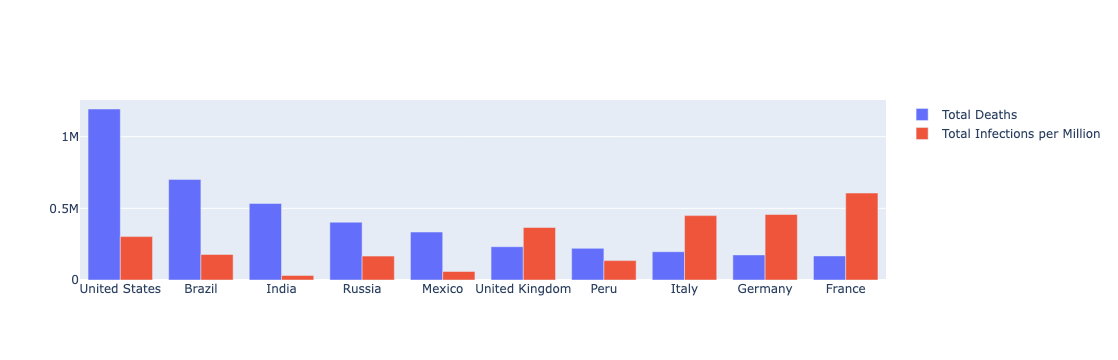

In [24]:
fig = go.Figure(data=[
    go.Bar(name='Total Deaths', x=top_deaths['location'], y=top_deaths['total_deaths']),
    go.Bar(name='Total Infections per Million', x=top_deaths['location'], y=top_deaths['total_cases_per_million']) 
    # Considering cases per million cz of the scale size
])

fig.update_layout(barmode='group')
fig.show()

### The above graph depicts the top 10 total deaths by country with thier total infections per million respectively, for understanding how the the infections resulted in death and how hard did the covid impact the world.

# (b) (iii) Creating graph visualizations to suggest vaccination to old people 

In [27]:
# Considering the latest available data of each country for analysis
df4 = df[df['date']== max_date]
df4 = df4[df4['iso_code'].isin(uniq_coun_code)]
df4 = df4[['iso_code','location','total_cases','total_deaths','total_cases_per_million','positive_rate','total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated','total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred','median_age', 'aged_65_older','population']]
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1673 to 429434
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             234 non-null    object 
 1   location                             234 non-null    object 
 2   total_cases                          233 non-null    float64
 3   total_deaths                         233 non-null    float64
 4   total_cases_per_million              233 non-null    float64
 5   positive_rate                        0 non-null      float64
 6   total_vaccinations                   2 non-null      float64
 7   people_vaccinated                    2 non-null      float64
 8   people_fully_vaccinated              2 non-null      float64
 9   total_vaccinations_per_hundred       2 non-null      float64
 10  people_vaccinated_per_hundred        2 non-null      float64
 11  people_fully_vaccinated_per_hun

## Grouping the dataset with respect to median age of the population

In [29]:
df3 = df[df['iso_code'].isin(uniq_coun_code)] # Considering all the countries only
dft3 = df3.groupby(['median_age']).agg({     # Grouping the data on median age for understanding the data on age factor
    'people_vaccinated_per_hundred': 'max',
    'people_fully_vaccinated_per_hundred' : 'max',
    'population': 'max',
    'total_cases_per_million' : 'max',
    'total_deaths_per_million' : 'max'
}).reset_index()                              # Resetting the index of the resultant data entries for graph readability
dft3 = dft3.dropna()
dft3

median_age  people_vaccinated_per_hundred  \
0          15.1                          23.84   
1          16.4                          42.40   
2          16.7                          29.04   
3          16.8                          50.99   
4          17.0                          17.22   
..          ...                            ...   
135        45.5                          86.95   
137        46.2                          95.62   
138        46.6                          77.82   
139        47.9                          86.28   
140        48.2                          84.47   

     people_fully_vaccinated_per_hundred  population  total_cases_per_million  \
0                                  20.92    26207982                  376.028   
1                                  27.64    47249588                 3638.641   
2                                  28.33    17723312                  417.332   
3                                  43.57    35588996                 3016.162   
4                                  14.54    99010216                  986.445   
..                                   ...         ...                      ...   
135                                85.66    47558632               292302.160   
137                                86.75    10270857               543733.100   
138                                76.24    83369840               457123.100   
139                                81.21    59037472               449202.940   
140                                83.40   123951696               270433.800   

     total_deaths_per_million  
0                      12.445  
1                      76.766  
2                      10.512  
3                      76.453  
4                      14.395  
..                        ...  
135                  2547.692  
137                  2765.556  
138                  2080.947  
139                  3309.459  
140                   597.564  

[131 rows x 6 columns]

## The trend of cases and deaths on median aged population

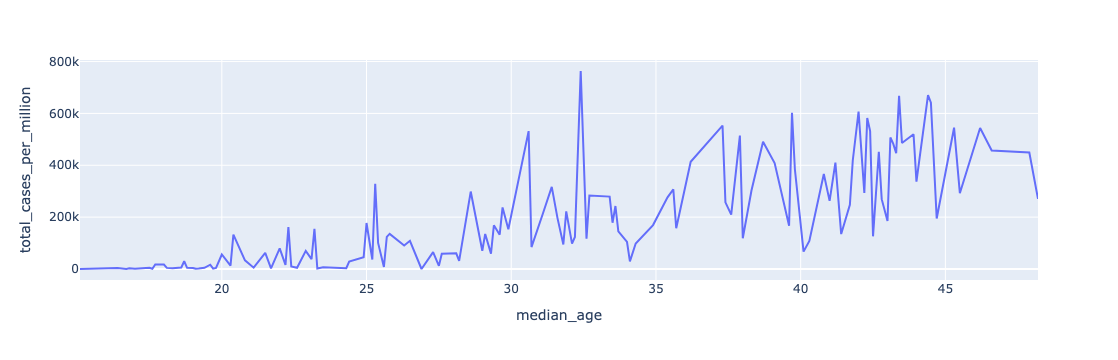

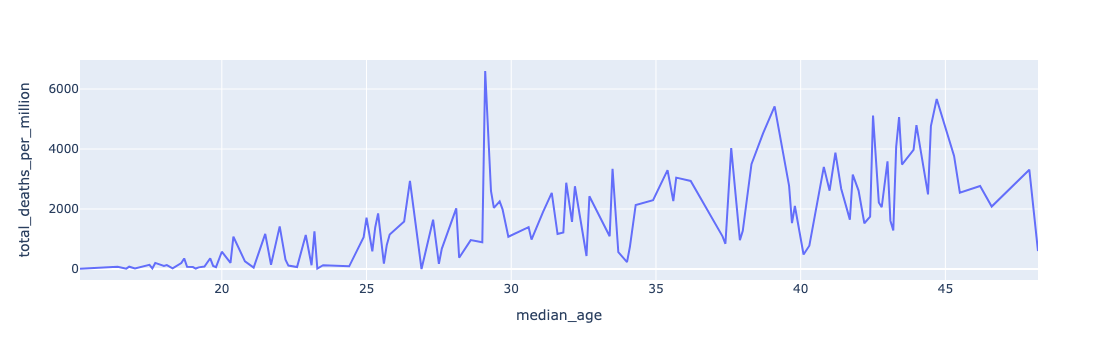

In [31]:
fig = px.line(dft3, x='median_age', y='total_cases_per_million')
fig.show()
fig2 = px.line(dft3, x='median_age', y='total_deaths_per_million')
fig2.show()

### Above graphs depicts that as age increases the probability of getting infected and death is higher. As observed, people below 32 yrs are less susceptible to infection than the people aged higher. But can be better understood in a scatter plot as shown below which gives a better sense on how death toll increases rapidly with age. 

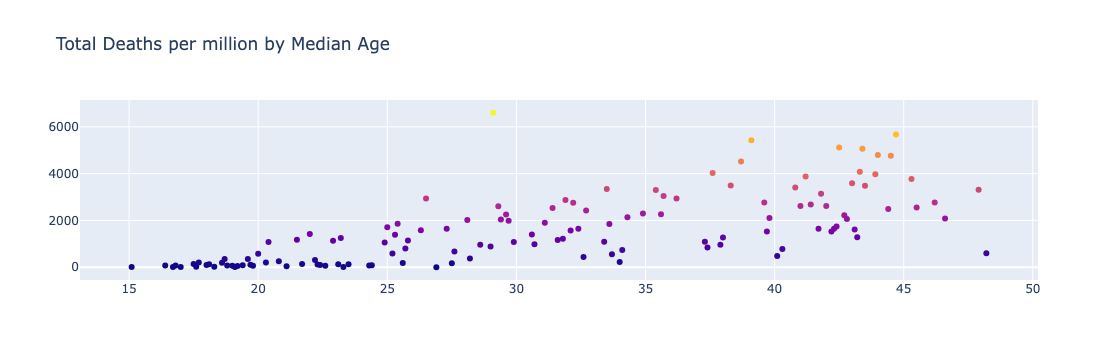

In [33]:
fig = go.Figure(data=go.Scatter(x=dft3['median_age'],
                                y=dft3['total_deaths_per_million'],
                                mode='markers',
                                marker_color=dft3['total_deaths_per_million'],
                                text=dft3['population'])) 

fig.update_layout(title='Total Deaths per million by Median Age')
fig.show()

### As seen in the above graph, as the median aged population increases, the probability of death due to covid infection rises rapidly.

## Grouping by the % population above 65 yrs as a result targetting the old aged people

In [36]:
dft4 = df.groupby(['aged_65_older']).agg({          # Grouping the data according to the percentage of population aged 65 or more
    'people_vaccinated_per_hundred': 'max',         # Considering the max values as we need the most recent data and the attribute is unique to all countries
    'people_fully_vaccinated_per_hundred' : 'max',
    'population': 'max',
    'total_cases_per_million' : 'max',
    'total_deaths_per_million' : 'max',
}).reset_index()
dft4 = dft4.dropna()

## The below 2 graphs helps to visualize the impact of covid on older population and suggest them vaccination

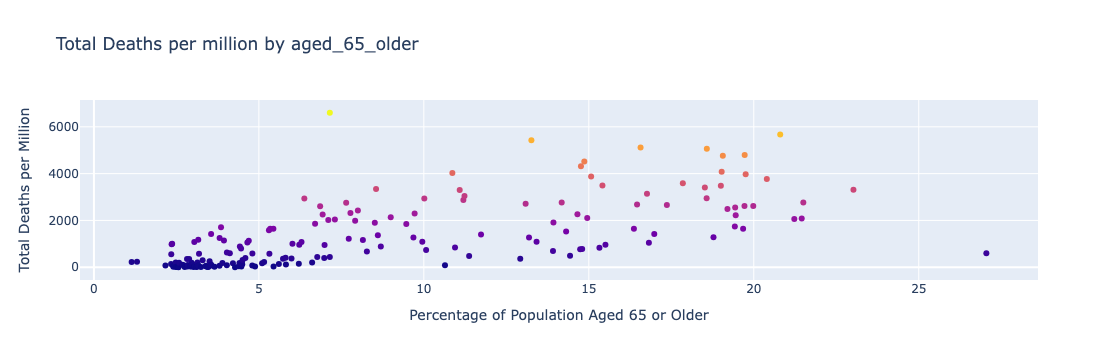

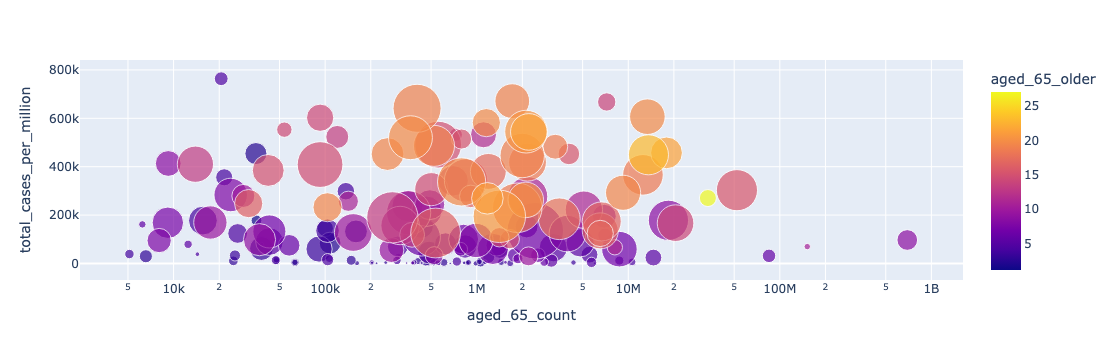

In [38]:
fig1 = go.Figure(data=go.Scatter(x=dft4['aged_65_older'],
                                y=dft4['total_deaths_per_million'],
                                mode='markers',
                                marker_color=dft4['total_deaths_per_million'],
                                text=dft4['population'])) 

fig1.update_layout(title='Total Deaths per million by aged_65_older', xaxis_title='Percentage of Population Aged 65 or Older',
    yaxis_title='Total Deaths per Million')
fig1.show()
dft4['aged_65_count'] = dft4['aged_65_older']/100 * dft4['population'] # calculating the 65+ yrs aged people out of each country population for better stats
fig2 = px.scatter(dft4, x="aged_65_count", y="total_cases_per_million",
	         size="total_deaths_per_million", color="aged_65_older",
                 hover_name="aged_65_older", log_x=True, size_max=40) # Using log function for better spread of data and visualization
fig2.show()

# For figure 2 : Size of scatter bubbles implies the total deaths per million

#### The 1st graph depicts how the rise in the aged population directly impacts the death cases in the population. If we observe close enough, we are able to draw a conclusion on how the percentage of aged population increasing leads to linear increase in deaths cases, hence deriving to the conclusion that aged people are much more vulnerable to the disease. 2nd graph shows how the age_65_count increases, the size of the bubble(denoting the death cases) and infections increases rapidly with the aged population as seen by the color gradient too.

## Utilizing the world data which was provided in the dataset to show the effect of vaccination on new deaths

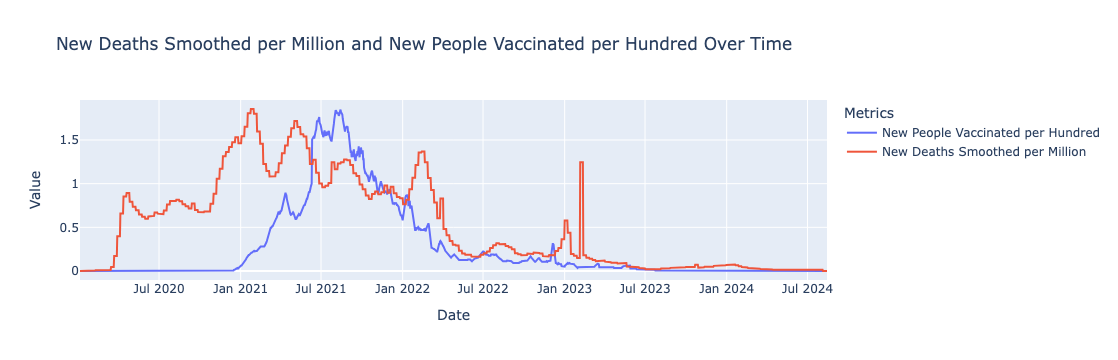

In [41]:
test_set = df[df['iso_code']== "OWID_WRL"]
com = test_set[['date','new_deaths_smoothed_per_million','total_deaths_per_million','new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed_per_hundred','new_cases_smoothed','new_deaths_smoothed','new_deaths_per_million']]
com = com.fillna(0) # Fillinf NaN values to zero for graph readability and no loss of data rows
fig = px.scatter(com, x="date", y="new_deaths_smoothed_per_million",
	         size="new_deaths_smoothed", color="new_cases_smoothed",
                 hover_name="new_deaths_smoothed", size_max=30)

fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=com['date'], y=com['new_people_vaccinated_smoothed_per_hundred']* 7, mode='lines', name='New People Vaccinated per Hundred'))
fig3.add_trace(go.Scatter(x=com['date'], y=com['new_deaths_smoothed_per_million'], mode='lines', name='New Deaths Smoothed per Million'))
fig3.update_layout(
    title='New Deaths Smoothed per Million and New People Vaccinated per Hundred Over Time',
    xaxis_title='Date',
    yaxis_title='Value',
    legend_title='Metrics'
)

# Show the figure
fig3.show()

#### The above graph can be used to help the older population understand the importance of vaccination as shown in the graph where the rise of new vaccinated people decreased the death toll. Also, deriving new insights on the data during Jan 2022 & 2023 which were new variants of covid.

# (b) (iv) Making a visualization to warn your neighborhood about the trend of covid.

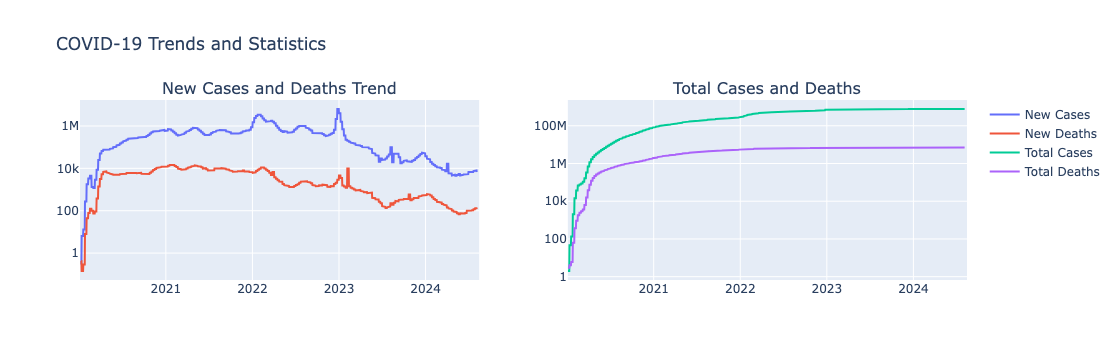

In [44]:
df5 = test_set # Considering the world data 
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=('New Cases and Deaths Trend', 'Total Cases and Deaths', 
                                    'Vaccination Progress', 'Hospitalization Rates'))

# Add Trend of New Cases and Deaths
fig.add_trace(go.Scatter(x=df5['date'], y=df5['new_cases_smoothed'], mode='lines', name='New Cases'), row=1, col=1)
fig.add_trace(go.Scatter(x=df5['date'], y=df5['new_deaths_smoothed'], mode='lines', name='New Deaths'), row=1, col=1)

fig.update_yaxes(type="log", row=1, col=1) # Applying log to y-axis for more readable output as scales don't match

fig.add_trace(go.Scatter(x=df5['date'], y=df5['total_cases'], name='Total Cases'),row=1, col=2,)
fig.add_trace(go.Scatter(x=df5['date'], y=df5['total_deaths'], name='Total Deaths'), row=1, col=2)

fig.update_yaxes(type="log", row=1, col=2) # Applying log to y-axis for more readable output as scales don't match

fig.update_layout(title_text='COVID-19 Trends and Statistics', showlegend=True)
fig.show()


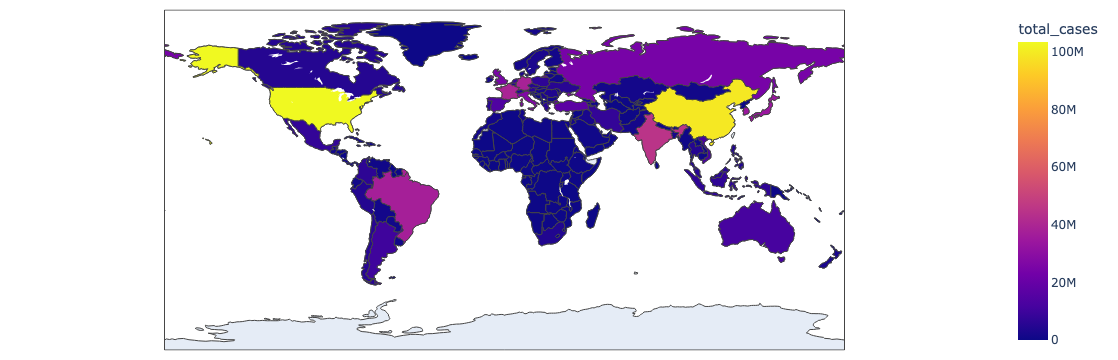

In [45]:
fig = px.choropleth(df6, locations="iso_code",
                    color="total_cases", 
                    hover_name="location", 
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
    margin=dict(l=20, r=10, t=10, b=10))
fig.show()

#### The above graphs depicts how badly the covid impacted the whole world leading to a total of 776 million infections and 7 million deaths approx. From year 2020 to 2023 end, covid really impacted the whole populations seeing the steady rise of cases and deaths with new variants nullifying the vaccination and crowd control. As seen on the world map, it really reached all corners of the world impacting the world and leading to may countries with higher infection and death rates.

# (c) How effective is the vaccination?
## (i) Understanding the problem statement, we can apply few conditions and constraints on the dataset to come up with a detailed visualization on how well the vaccine has done in eliminating the chances of infection and its cause of death.

### Lets apply the following conditions for deepened visualization and conclusion on the problem statement :

 1. Apply time-frame to normalize the data to all origins
 2. Key variables being new cases, new deaths, Hospitalisation rates, people vaccinated and population
 3. Evaluate based on infection rates, hospitalization rates, mortality rates



## (ii) Explain your approach to your problem statement 

Firstly, we need to understand on how to arrive to a conclusion on the problem statement. For that, we need proper analysis and visualization of the dataset on factors mentioned in the above conditions like infection rates before and after vaccination and so on. Secondly, based on the metrics we choose we need to select the data attributes and analyze thier relationship between the problem statement and other attributes.

Then we go on to process the data and clean it in all aspects and set the time frame to analyze the data in a better constraint. After succesful data processing we try to model the effect of vaccination on graphs and do statistical analysis for better understanding of the data to determine if higher vaccination rates are associated with lower case counts and fewer severe outcomes, which helps us to reach our hypothesis. 

## (iii) Perform data cleaning to get the pure data for this problem 

In [50]:
duplicates = df.duplicated() # check for any duplicated row entries
num = duplicates.sum()
print("No. of duplicated rows :",num,'\n')
df # Consider the dataset to be cleaned

No. of duplicated rows : 0 



iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-01-05          0.0        0.0   
1           AFG      Asia  Afghanistan 2020-01-06          0.0        0.0   
2           AFG      Asia  Afghanistan 2020-01-07          0.0        0.0   
3           AFG      Asia  Afghanistan 2020-01-08          0.0        0.0   
4           AFG      Asia  Afghanistan 2020-01-09          0.0        0.0   
...         ...       ...          ...        ...          ...        ...   
429430      ZWE    Africa     Zimbabwe 2024-07-31     266386.0        0.0   
429431      ZWE    Africa     Zimbabwe 2024-08-01     266386.0        0.0   
429432      ZWE    Africa     Zimbabwe 2024-08-02     266386.0        0.0   
429433      ZWE    Africa     Zimbabwe 2024-08-03     266386.0        0.0   
429434      ZWE    Africa     Zimbabwe 2024-08-04     266386.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           0.0         0.0                  NaN   
1                      NaN           0.0         0.0                  NaN   
2                      NaN           0.0         0.0                  NaN   
3                      NaN           0.0         0.0                  NaN   
4                      NaN           0.0         0.0                  NaN   
...                    ...           ...         ...                  ...   
429430                 0.0        5740.0         0.0                  0.0   
429431                 0.0        5740.0         0.0                  0.0   
429432                 0.0        5740.0         0.0                  0.0   
429433                 0.0        5740.0         0.0                  0.0   
429434                 0.0        5740.0         0.0                  0.0   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0       ...           NaN                  37.746                         0.5   
1       ...           NaN                  37.746                         0.5   
2       ...           NaN                  37.746                         0.5   
3       ...           NaN                  37.746                         0.5   
4       ...           NaN                  37.746                         0.5   
...     ...           ...                     ...                         ...   
429430  ...          30.7                  36.791                         1.7   
429431  ...          30.7                  36.791                         1.7   
429432  ...          30.7                  36.791                         1.7   
429433  ...          30.7                  36.791                         1.7   
429434  ...          30.7                  36.791                         1.7   

        life_expectancy  human_development_index  population  \
0                 64.83                    0.511    41128772   
1                 64.83                    0.511    41128772   
2                 64.83                    0.511    41128772   
3                 64.83                    0.511    41128772   
4                 64.83                    0.511    41128772   
...                 ...                      ...         ...   
429430            61.49                    0.571    16320539   
429431            61.49                    0.571    16320539   
429432            61.49                    0.571    16320539   
429433            61.49                    0.571    16320539   
429434            61.49                    0.571    16320539   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN                          NaN   
4                             

In [51]:
df_cleaned = df[(df['date'] >= min_date) & (df['date'] <= max_date)] # Considering a common time-frame for analysis of data
df_cleaned =  df_cleaned[['date','iso_code','location','new_cases_smoothed_per_million','new_deaths_smoothed_per_million','weekly_icu_admissions_per_million','weekly_hosp_admissions_per_million',
       'new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred','population','people_vaccinated_per_hundred']]
# Considering the important factor attributes for analysis
df7 = df_cleaned
dft7 = df_cleaned

In [52]:
df_cleaned.isnull().sum() # Checking for incomplete data

date                                               0
iso_code                                           0
location                                           0
new_cases_smoothed_per_million                 20362
new_deaths_smoothed_per_million                19913
weekly_icu_admissions_per_million             418307
weekly_hosp_admissions_per_million            404806
new_vaccinations_smoothed_per_million         234343
new_people_vaccinated_smoothed                237188
new_people_vaccinated_smoothed_per_hundred    237188
population                                         0
people_vaccinated_per_hundred                 348266
dtype: int64

In [53]:
# Trying to fill the NaN values by estimation with nearest data points
test11 = df_cleaned[['new_cases_smoothed_per_million','new_deaths_smoothed_per_million','weekly_icu_admissions_per_million','weekly_hosp_admissions_per_million',
       'new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred','population','people_vaccinated_per_hundred']].interpolate()
test11[['date','iso_code','location']] = df_cleaned[['date','iso_code','location']] # because interpolation works on numericals only
new_order = ['date','iso_code','location','new_cases_smoothed_per_million','new_deaths_smoothed_per_million','weekly_icu_admissions_per_million','weekly_hosp_admissions_per_million',
       'new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred','people_vaccinated_per_hundred','population']
test11 = test11[new_order]
test11 = test11.dropna()
test11.reset_index(drop=True, inplace=True) # Resetting the index values for each row
test11

date iso_code  location  new_cases_smoothed_per_million  \
0      2020-04-15      CHL     Chile                          20.209   
1      2020-04-16      CHL     Chile                          20.209   
2      2020-04-17      CHL     Chile                          20.209   
3      2020-04-18      CHL     Chile                          20.209   
4      2020-04-19      CHL     Chile                          20.479   
...           ...      ...       ...                             ...   
357203 2024-07-31      ZWE  Zimbabwe                           0.000   
357204 2024-08-01      ZWE  Zimbabwe                           0.000   
357205 2024-08-02      ZWE  Zimbabwe                           0.000   
357206 2024-08-03      ZWE  Zimbabwe                           0.000   
357207 2024-08-04      ZWE  Zimbabwe                           0.000   

        new_deaths_smoothed_per_million  weekly_icu_admissions_per_million  \
0                                 0.336                              9.947   
1                                 0.336                              9.896   
2                                 0.336                              9.335   
3                                 0.336                              8.570   
4                                 0.387                              9.182   
...                                 ...                                ...   
357203                            0.000                              1.892   
357204                            0.000                              1.892   
357205                            0.000                              1.892   
357206                            0.000                              1.892   
357207                            0.000                              1.892   

        weekly_hosp_admissions_per_million  \
0                                   28.056   
1                                   27.903   
2                                   29.484   
3                                   30.861   
4                                   31.525   
...                                    ...   
357203                               1.577   
357204                               1.577   
357205                               1.577   
357206                               1.577   
357207                               1.577   

        new_vaccinations_smoothed_per_million  new_people_vaccinated_smoothed  \
0                                  137.612565                     2674.745201   
1                                  138.031414                     2683.029668   
2                                  138.450262                     2691.314136   
3                                  138.869110                     2699.598604   
4                                  139.287958                     2707.883072   
...                                       ...                             ...   
357203                              69.000000                      332.000000   
357204                              69.000000                      332.000000   
357205                              69.000000                      332.000000   
357206                              69.000000                      332.000000   
357207                              69.000000                      332.000000   

        new_people_vaccinated_smoothed_per_hundred  \
0                                         0.013361   
1                                         0.013403   
2                                         0.013445   
3                                         0.013487   
4                                         0.013529   
...                                            ...   
357203                                    0.002000   
357204                                    0.002000   
357205                                    0.002000   
357206                                    0.002000   
357207                                    0.002000   

        people_vaccinated_per_hundre

In [54]:
test11.isnull().sum() # Data NaN free

date                                          0
iso_code                                      0
location                                      0
new_cases_smoothed_per_million                0
new_deaths_smoothed_per_million               0
weekly_icu_admissions_per_million             0
weekly_hosp_admissions_per_million            0
new_vaccinations_smoothed_per_million         0
new_people_vaccinated_smoothed                0
new_people_vaccinated_smoothed_per_hundred    0
people_vaccinated_per_hundred                 0
population                                    0
dtype: int64

In [55]:
dft7 = df_cleaned.dropna()                # Dataset cleaned by dropping all NaN values 
dft7.reset_index(drop=True, inplace=True) # Resetting the index values for each row
dft7

date iso_code location  new_cases_smoothed_per_million  \
0    2020-12-25      CHL    Chile                          99.166   
1    2020-12-26      CHL    Chile                          99.166   
2    2020-12-27      CHL    Chile                         109.884   
3    2021-01-04      CHL    Chile                         127.916   
4    2021-01-05      CHL    Chile                         127.916   
...         ...      ...      ...                             ...   
6606 2023-02-15      ESP    Spain                          18.142   
6607 2023-02-22      ESP    Spain                          18.074   
6608 2023-03-29      ESP    Spain                          22.632   
6609 2023-04-26      ESP    Spain                          32.458   
6610 2023-05-24      ESP    Spain                          32.924   

      new_deaths_smoothed_per_million  weekly_icu_admissions_per_million  \
0                               1.863                             16.834   
1                               1.863                             16.834   
2                               2.214                             16.527   
3                               2.338                             17.803   
4                               2.338                             17.905   
...                               ...                                ...   
6606                            0.308                              1.766   
6607                            0.254                              1.556   
6608                            0.284                              1.619   
6609                            0.335                              1.998   
6610                            0.299                              2.691   

      weekly_hosp_admissions_per_million  \
0                                 61.825   
1                                 63.661   
2                                 66.110   
3                                 73.710   
4                                 79.220   
...                                  ...   
6606                              27.440   
6607                              29.311   
6608                              35.136   
6609                              43.546   
6610                              39.719   

      new_vaccinations_smoothed_per_million  new_people_vaccinated_smoothed  \
0                                     244.0                          4779.0   
1                                     202.0                          3960.0   
2                                     140.0                          2743.0   
3                                       3.0                            51.0   
4                                      13.0                           250.0   
...                                     ...                             ...   
6606                                  258.0                           164.0   
6607                                  189.0                           137.0   
6608                                  127.0                           117.0   
6609                                   50.0                            65.0   
6610                                   30.0                            68.0   

      new_people_vaccinated_smoothed_per_hundred  population  \
0                                          0.024    19603736   
1                                          0.020    19603736   
2                                          0.014    19603736   
3                                          0.000    19603736   
4                                          0.001    19603736   
...                                          ...         ...   
6606                                       0.000    47558632   
6607                                       0.000    47558632   
6608                                       0.000    47558632   
6609                                       0.000    47558632   
6610                                       0.000    47558632   

      people_vaccinate

## (c) (iv) Implement your approach to this problem and justify your hypothesis

### Hypothesis : Higher vaccination rates directly impacts the significant reduction in new COVID-19 cases, hospitalizations, and deaths. Consequently, proving the effectiveness of the vaccine to be really good.

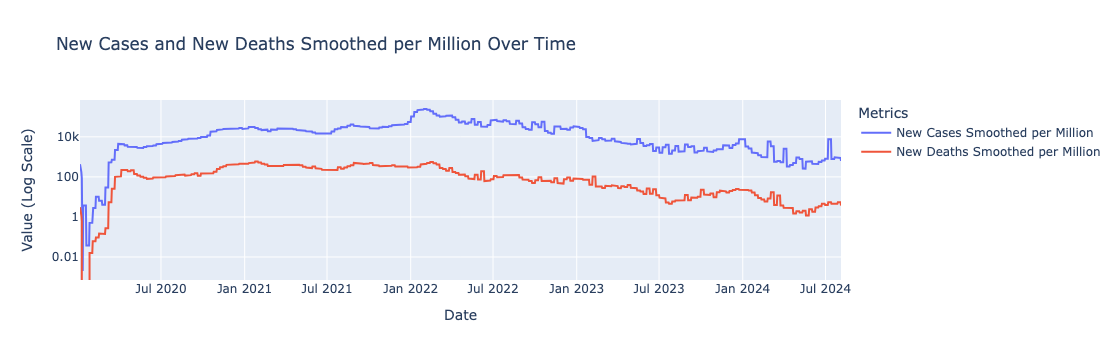

In [57]:
testc = test11.groupby(['date']).agg({          # Grouping the data by date to consider the trend over time
    'new_cases_smoothed_per_million' : 'sum',   # Taking the sum to consider the world data on a given day
    'new_deaths_smoothed_per_million' : 'sum'
}).reset_index()

fig = go.Figure()

# Add the time series plot with log scale for the y-axis
fig.add_trace(
    go.Scatter(x=testc['date'], y=testc['new_cases_smoothed_per_million'], mode='lines', name='New Cases Smoothed per Million')
)

fig.add_trace(
    go.Scatter(x=testc['date'], y=testc['new_deaths_smoothed_per_million'], mode='lines', name='New Deaths Smoothed per Million')
)

fig.update_layout(
    title='New Cases and New Deaths Smoothed per Million Over Time',
    xaxis_title='Date',
    yaxis_title='Value (Log Scale)',
    legend_title='Metrics'
)

fig.update_yaxes(
    type='log'
)

fig.show()

#### The above graph depicts the new cases and deaths smoothed over a week(as the cases and deaths have lag in interpreting the real data). Observing the above trend, the number of new infections decreased by 28 times and death cases by 110 times. Thus, concluding on somekind of measure or vaccine (to verify) effectively worked to bring down the trend in covid.

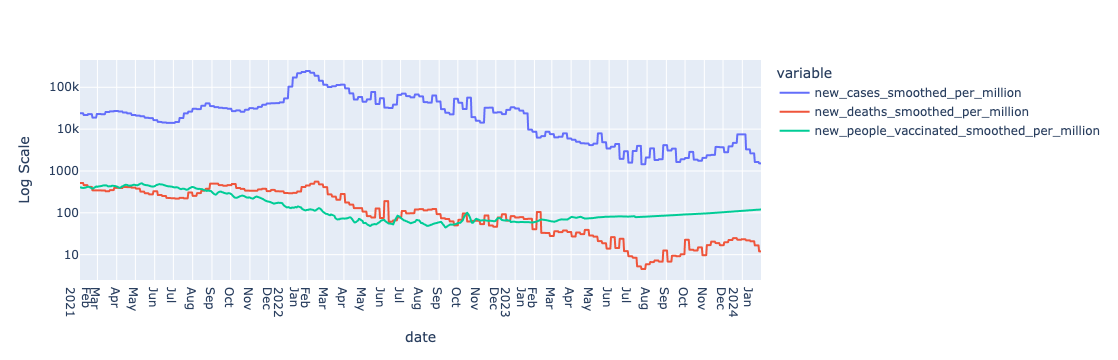

In [59]:
# considering a time frame for better analysis and lesser data points for less cluttered outputs
start_date = '2021-02-01'
end_date = '2024-01-31'
test12 = test11[(test11['date'] >= start_date) & (test11['date'] <= end_date)] 
test12 = test12.groupby(['date']).agg({
    'new_cases_smoothed_per_million': 'sum',
    'new_deaths_smoothed_per_million': 'sum',
    'new_people_vaccinated_smoothed_per_hundred': 'sum',
    'weekly_icu_admissions_per_million' : 'sum',
    'weekly_hosp_admissions_per_million': 'sum'
}).reset_index()

# Convert New People Vaccinated Smoothed per Hundred to per Million
test12['new_people_vaccinated_smoothed_per_million'] = test12['new_people_vaccinated_smoothed_per_hundred'] * 10

fig = px.line(
    test12,
    x="date",
    y=[
        'new_cases_smoothed_per_million', 
        'new_deaths_smoothed_per_million',
        'new_people_vaccinated_smoothed_per_million'
    ],
    hover_data={"date": "|%B %d, %Y"},
    labels={
        'new_cases_smoothed_per_million': 'New Cases Smoothed per Million',
        'new_deaths_smoothed_per_million': 'New Deaths Smoothed per Million',
        'new_people_vaccinated_smoothed_per_million': 'New People Vaccinated Smoothed per Million'
    }
)

fig.update_xaxes(
    dtick="M1",          
    tickformat="%b\n%Y" 
)

fig.update_yaxes(
    type='log',
    title_text='Log Scale'
)

fig.show()

#### Checking the possibilty of the vaccine being the effective measure taken. We can see that as new people getting vaccinated increases, it lowers the new infections and new deaths, showing its effectiveness.

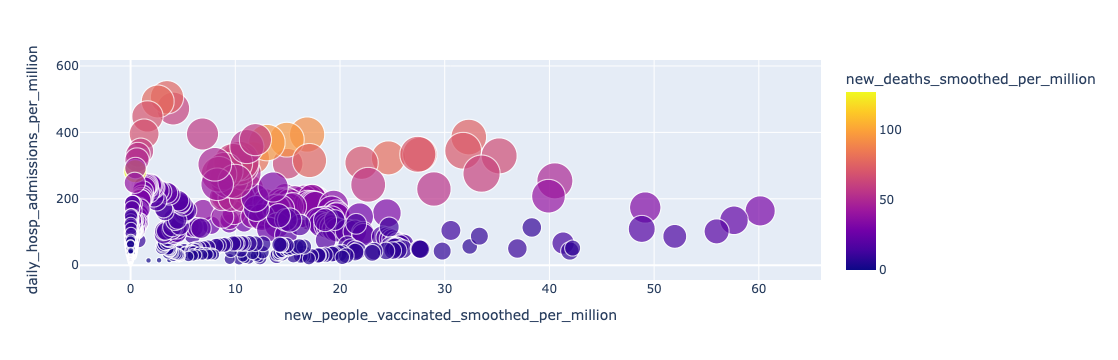

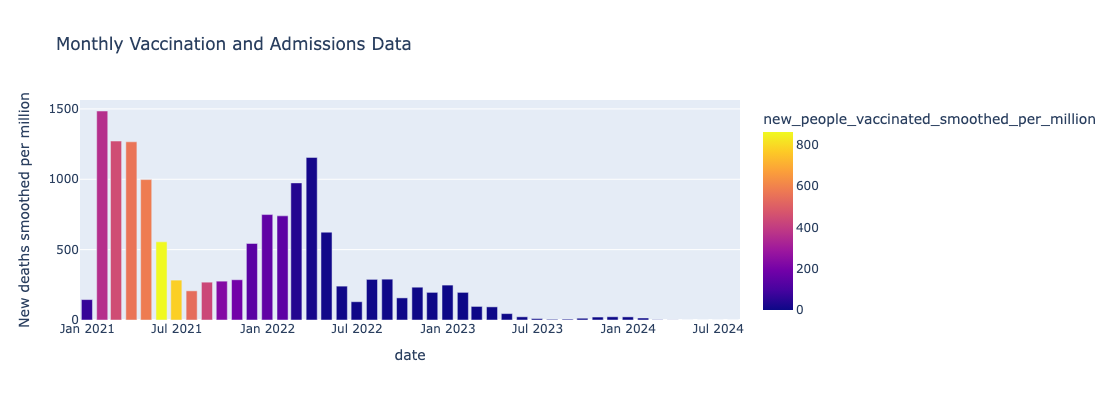

In [61]:
test13 = dft7.groupby(['date',]).agg({                   # Grouping the data on date for time data 
    'weekly_icu_admissions_per_million' : 'sum',         # sum bcz considering all the data for a given date
    'weekly_hosp_admissions_per_million': 'sum',
    'new_deaths_smoothed_per_million' : 'sum',
    'new_people_vaccinated_smoothed_per_hundred': 'sum',
    'people_vaccinated_per_hundred' : 'mean'         # mean bcz it tells people vaccinated for every 100 people & as for the whole population
}).reset_index()

test13['new_people_vaccinated_smoothed_per_million'] = test13['new_people_vaccinated_smoothed_per_hundred'] * 10
test13['daily_hosp_admissions_per_million'] = test13['weekly_hosp_admissions_per_million']/7
test13['daily_icu_admissions_per_million'] = test13['weekly_icu_admissions_per_million']/7


fig2 = px.scatter(test13, x="new_people_vaccinated_smoothed_per_million", y="daily_hosp_admissions_per_million",
	         size="daily_icu_admissions_per_million", color="new_deaths_smoothed_per_million",
                 hover_name="new_deaths_smoothed_per_million", size_max=40)

fig2.show()
test14 = test13

# Set 'date' as index for resampling 
test14.set_index('date', inplace=True)

# Aggregate data by month 
monthly_data = test14.resample('ME').agg({
    'new_people_vaccinated_smoothed_per_million': 'sum',
    'daily_hosp_admissions_per_million': 'sum',
    'daily_icu_admissions_per_million': 'sum',
    'new_deaths_smoothed_per_million': 'sum'
}).reset_index()

fig = px.bar(
    monthly_data,
    x='date',
    y='new_deaths_smoothed_per_million',
    hover_data={
        'daily_hosp_admissions_per_million': True,
        'daily_icu_admissions_per_million': True,
        'new_deaths_smoothed_per_million': True
    },
    color='new_people_vaccinated_smoothed_per_million',
    labels={'new_deaths_smoothed_per_million': 'New deaths smoothed per million'},
    height=400,
    title='Monthly Vaccination and Admissions Data'
)

fig.show()

#### The 1st graph tells the downward trend on daily hospitalizations and icu admits(the size of bubble) as new people get vaccinated. The 2nd graph depicts the new deaths trend by time, observing the new people getting vaccinated wave in Feb 2021 to Jan 2022 leading to the decline in the new deaths, thus succesfully representing the effectiveness of the vaccine on people (The trend from Jan 2022 is the rise of new covid variants).

# (d) How long does the virus take on average to kill a person if it does kill a person after infection?

## (i) Explain your approach to this problem.

#### As we need to comee up with a certain metric to analyze how long the virus takes to kill a person on infection, we would require the exact dates to compute it. But our dataset doesn't have those attributes required. But we can approach it the other way by using the new cases and new deaths smoothed to a week to figure out the lag between a new case and a new death for all countries. By calculating the mean lag between each of the countries we would end up with the approximate day average of the virus to kill a person.

## (ii) Perform data cleaning to get the pure data for this problem. 
1. Consider only the countries out of the whole dataset
2. Filter out the columns to relevant ones which will be used for the problem
3. Drop the null values out from the data (as very less NaN values for the filtered attributes so dropping will not raise bias)
4. Convert the date column to date-time for easier computation

## (iii) Implement your approach and compute the estimate.

Average lag between new cases and new deaths across all countries: 16.84 days


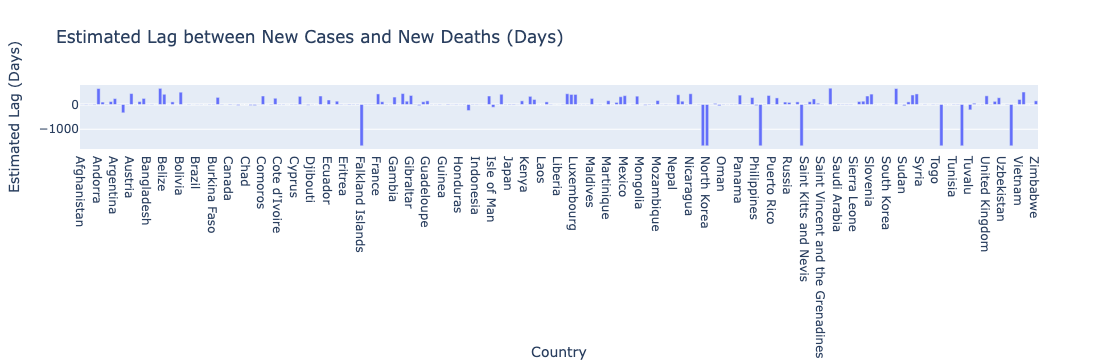

In [68]:
# Filter relevant columns and removing NaN values for cleaning the data 
test17 = df[(df['iso_code'].isin(uniq_coun_code))]
test17 = test17[['date', 'location', 'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million']].dropna() # Drops the rows with NaN values

# Convert 'date' column to datetime pandas version 
test17['date'] = pd.to_datetime(test17['date'])

# Define a function to calculate the lag between new cases and new deaths using correlation
def estimate_lag(country_df):
    new_cases = country_df['new_cases_smoothed_per_million'].values
    new_deaths = country_df['new_deaths_smoothed_per_million'].values

    # Compute cross-correlation between new cases and new deaths using numpy
    correlation = correlate(new_cases, new_deaths, mode='full')
    lags = np.arange(-len(new_cases) + 1, len(new_deaths))
    
    # Find the lag with the maximum correlation
    best_lag = lags[np.argmax(correlation)]
    
    return best_lag

# Group the data by country (location) and apply the lag estimation function
lag_estimates = test17.groupby('location').apply(
    lambda x: estimate_lag(x[['new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million']]),include_groups=False
)

# Calculate the average lag across all countries
average_lag = lag_estimates.mean()
print(f"Average lag between new cases and new deaths across all countries: {average_lag:.2f} days")

# Visualize the estimated lags per country
lag_estimates_df = lag_estimates.reset_index(name='lag')
fig = px.bar(lag_estimates_df, x='location', y='lag', title='Estimated Lag between New Cases and New Deaths (Days)',
             labels={'lag': 'Estimated Lag (Days)', 'location': 'Country'})

fig.show()

#### The above graph depicts each countries lag toward the new cases and new deaths. By calculating each countries lag by computing the correlation between them and finding the best correlated data which becomes the best lag for that country, we obtain the mean of all countries to figure out the lag. As "Average lag between new cases and new deaths" refers to the average amount of time it takes a person getting infected with a virus to that person dying from the virus. Thus, after the analysis, we found that a person approximately takes **16.84 days** to die from the day of infection on average.

# (e) While understanding the dataset, I came across the attribute stringency index and gdp_per_capita. I was wondering how did each of the countries handle this crisis with limited knowledge and resources. And did the strict rules imposed on the population and being self-sufficient help the countries handle the situation.

### **Findings/Hypothesis** : Increase in stringency index (strict rules imposition) directly impacts in the reduction of deaths and cases. Whereas, availability of much resources and money considering gdp per capita doesnot effect the deaths and cases.

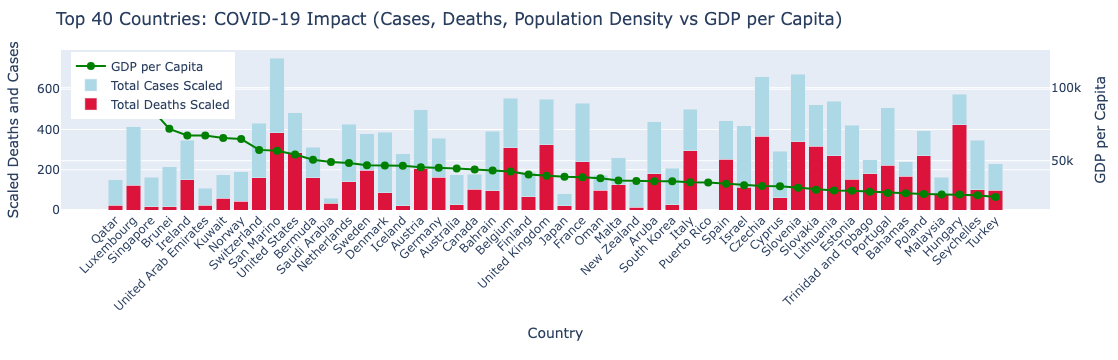

In [72]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

test20 = df[(df['iso_code'].isin(uniq_coun_code))]
test20 = test20[['location', 'gdp_per_capita', 'stringency_index', 'population_density', 'total_cases_per_million', 'total_deaths_per_million']].dropna()

# Normalize population density, deaths, and cases
scaler = MinMaxScaler()
test20[['population_density_scaled', 'total_deaths_scaled', 'total_cases_scaled']] = scaler.fit_transform(
    test20[['population_density', 'total_deaths_per_million', 'total_cases_per_million']]
)

# Group by location and aggregate the values
test20 = test20.groupby(['location']).agg({
    'gdp_per_capita': 'max',
    'population_density': 'mean',
    'total_deaths_scaled': 'sum',
    'total_cases_scaled': 'sum'
}).reset_index()

# Select top 50 countries based on GDP per capita
top_countries = test20.nlargest(50, 'gdp_per_capita')

fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_countries['location'], 
    y=top_countries['total_deaths_scaled'], 
    name='Total Deaths Scaled', 
    marker_color='crimson'
))

fig.add_trace(go.Bar(
    x=top_countries['location'], 
    y=top_countries['total_cases_scaled'], 
    name='Total Cases Scaled', 
    marker_color='lightblue'
))

# Create a line plot for GDP per capita on a secondary y-axis
fig.add_trace(go.Scatter(
    x=top_countries['location'], 
    y=top_countries['gdp_per_capita'], 
    mode='lines+markers', 
    name='GDP per Capita', 
    yaxis='y2', 
    line=dict(color='green', width=2),
    marker=dict(size=8, symbol='circle')
))


# Update layout with dual axes and better readability
fig.update_layout(
    title='Top 40 Countries: COVID-19 Impact (Cases, Deaths, Population Density vs GDP per Capita)',
    xaxis=dict(title='Country', tickangle=-45),
    yaxis=dict(title='Scaled Deaths and Cases'),
    yaxis2=dict(title='GDP per Capita', overlaying='y', side='right'),
    barmode='stack', 
    legend=dict(x=0.01, y=0.99),
    margin=dict(l=60, r=60, b=150, t=50),
    xaxis_tickfont_size=12  
)

fig.show()


#### The above graph depicts the effect of gdp_per_capita and availability of resources on the cases and deaths of covid. With the decrease in gdp per capita (refering how rich or poor a country is), some countries do show significant results like lesser deaths and cases with higher gdp_per_capita and lower income countries have higher deaths and cases but, many countries with much resources and money are not able to handle pandemic whereas the lowest gdp countries are able to control it. We can visualize it still more clearly in the below graph.

/var/folders/44/9qj8h9610f9cpmlbsc64dspw0000gn/T/ipykernel_1286/2989387455.py:18: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



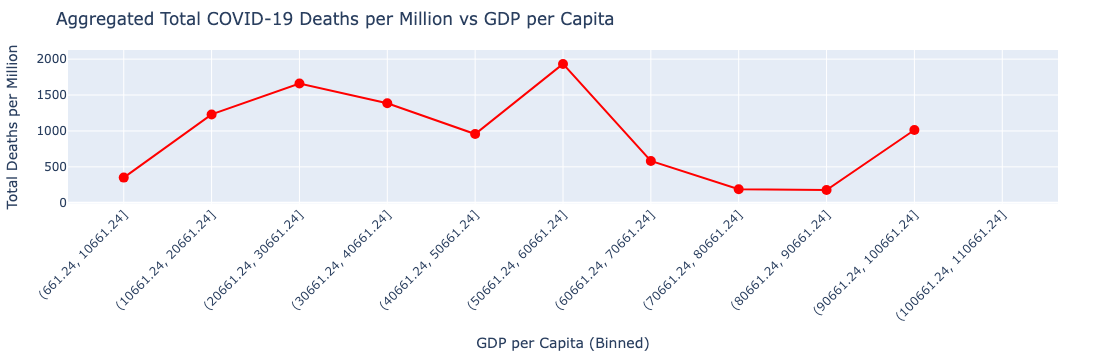

In [74]:
# Filter and aggregate the data
test20 = df[(df['iso_code'].isin(uniq_coun_code))]
test20 = test20[['gdp_per_capita', 'total_deaths_per_million']].dropna()

# Define bin parameters
start_point = test20['gdp_per_capita'].min()
freq = 10000  # Adjust frequency as needed for binning

# Create bins for gdp_per_capita
bins = pd.interval_range(start=start_point, 
                         end=test20['gdp_per_capita'].max(), 
                         freq=freq)  

# Bin the data into intervals
test20['gdp_bin'] = pd.cut(test20['gdp_per_capita'], bins)

# Aggregate data by bins
aggregated_data = test20.groupby('gdp_bin').agg({
    'total_deaths_per_million': 'mean'
}).reset_index()

# Extract bin labels for plotting
aggregated_data['gdp_bin'] = aggregated_data['gdp_bin'].astype(str)

# Create a scatter plot
fig = go.Figure()

# Add total deaths line plot
fig.add_trace(go.Scatter(
    x=aggregated_data['gdp_bin'],
    y=aggregated_data['total_deaths_per_million'],
    mode='lines+markers',
    name='Total Deaths per Million',
    line=dict(color='red', width=2),  
    marker=dict(size=10, symbol='circle'),  
    text=aggregated_data['total_deaths_per_million'],  
    hoverinfo='x+y+text'
))

fig.update_layout(
    title='Aggregated Total COVID-19 Deaths per Million vs GDP per Capita',
    xaxis_title='GDP per Capita (Binned)',
    yaxis_title='Total Deaths per Million',
    margin=dict(l=60, r=60, b=50, t=50),  
    xaxis=dict(title='GDP per Capita (Binned)', tickangle=-45),  
    yaxis=dict(title='Total Deaths per Million'),
    hovermode='closest'  
)

fig.show()

#### From the above graph, it gets clear that better resource availability or money can't control the pandemic's effect on the population. Here, we are segregating the gdp per capita into intervals (bins) such that we can access a better view on it. Few low income countries really managed the pandemic with lower accessibility to resources and funds which few high income countries could not. This explains the importance of managing the existing resources and controling it such a way that everyone is benefited from it, rather than just having the accessibility to funds and resources.

/var/folders/44/9qj8h9610f9cpmlbsc64dspw0000gn/T/ipykernel_1286/34863613.py:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



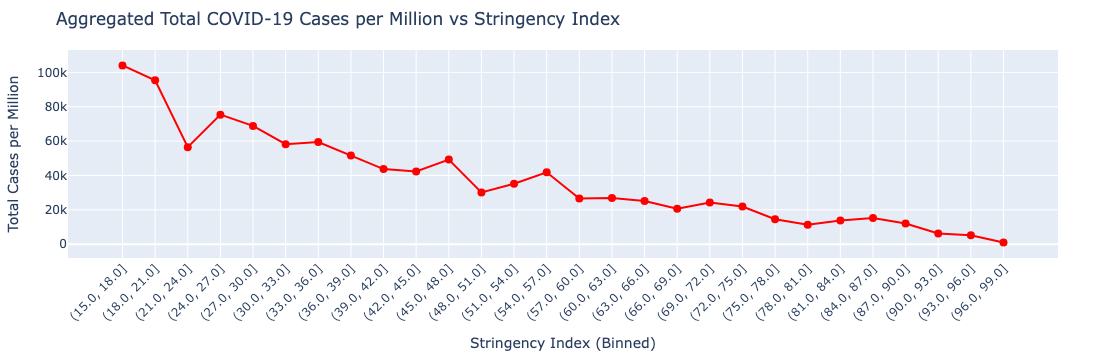

In [76]:
import pandas as pd
import plotly.graph_objects as go

# Filter and aggregate the data
test20 = df[(df['iso_code'].isin(uniq_coun_code))]
test20 = test20[['stringency_index', 'total_cases_per_million']].dropna()

# Define the start point and bin frequency
start_point = 15
freq = 3

# Adjust the start and end for binning
bins = pd.interval_range(start=start_point, 
                         end=test20['stringency_index'].max(), 
                         freq=freq)  

test20['stringency_bin'] = pd.cut(test20['stringency_index'], bins)

# Aggregate data by bins
aggregated_data = test20.groupby('stringency_bin').agg({
    'total_cases_per_million': 'mean'
}).reset_index()

# Extract bin labels for plotting
aggregated_data['stringency_bin'] = aggregated_data['stringency_bin'].astype(str)

# Create a line plot
fig = go.Figure()

# Add total cases line plot
fig.add_trace(go.Scatter(
    x=aggregated_data['stringency_bin'],
    y=aggregated_data['total_cases_per_million'],
    mode='lines+markers',
    name='Total Cases per Million',
    line=dict(color='red', width=2),  # Line style
    marker=dict(size=8, symbol='circle'),  # Marker style
    text=aggregated_data['total_cases_per_million'],  # Show the cases number on hover
    hoverinfo='x+y+text'
))

# Update layout for better readability
fig.update_layout(
    title='Aggregated Total COVID-19 Cases per Million vs Stringency Index',
    xaxis_title='Stringency Index (Binned)',
    yaxis_title='Total Cases per Million',
    margin=dict(l=60, r=60, b=50, t=50),  # Adjust margins for better spacing
    xaxis=dict(title='Stringency Index (Binned)', tickangle=-45),  # Rotate x-axis labels
    yaxis=dict(title='Total Cases per Million'),
    hovermode='closest'  # Ensure closest hover data
)

# Show the figure
fig.show()


#### The above graph shows the impact of strict rules (Stringency Index(0-100) ;low value->lenient rules;high value->strict rules; rules such as lockdown, mask rules, no huge crowd gatherings etc.) imposed on the population directly reducing the number of cases. This implies that if governments followed certain protocols and thier implementation rigidly, it reduced the number of cases drastically. One main reason behind the success of it is, the covid disease being an airborne disease which is directly derived from the above stats. As the people were made aware of the precautionary measures on how covid spreads and the lockdown was in effect, the cases reduced because the virus couldn't find ways to rapidly spread to other uninfected people, which was due to very low human interactivity. Thus, succesfully overcoming and controlling the pandemic.